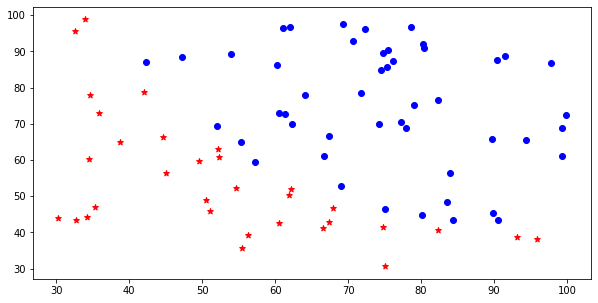

In [74]:
# 自助法
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("5_train.csv", header=None,names=["x1", "x2", "y"])
# 数据可视化
set_0 = data[data['y']==0]
set_1 = data[data["y"]==1]
plt.figure(figsize=(10,5))
plt.scatter(set_0["x1"], set_0["x2"], c="r", marker="*")
plt.scatter(set_1["x1"], set_1["x2"], c="b", marker="o")
plt.show()
#print(data)
train = data.sample(frac=1.0,replace=True) #有放回的随机抽样
test = data.loc[data.index.difference(train.index)].copy()
#print(train)
#print(test)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 进一步处理数据集和测试集，将输入和输出分割
train.columns=list(['x1','x2','y'])
test.columns=list(['x1','x2','y'])
X_train = np.asarray(train.get(['x1', 'x2']))
y_train = np.asarray(train.get('y'))
X_test = np.asarray(test.get(['x1', 'x2']))
y_test = np.asarray(test.get('y'))
# 使用 sklearn 的 LogisticRegression 作为模型
# 其中有 penalty，solver，multi_class 几个比较重要的参数，不同的参数有不同的准确率
model = LogisticRegression(solver='newton-cg')
# newton-cg sag lbfgs liblinear


# 对数据进行标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) 
X_test = ss.fit_transform(X_test)
# 拟合
model.fit(X_train, y_train)

# 预测测试集
predictions = model.predict(X_test)

# 打印准确率
print('测试集准确率：', accuracy_score(y_test, predictions))

weights = np.column_stack((model.intercept_, model.coef_)).transpose()
#print(weights)

测试集准确率： 0.9354838709677419


D:\anaconda\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [76]:
# 将原始数据标准化，并带入模型得到预测结果
X_orgin = np.asarray(data.get(['x1', 'x2']))
X_orgin = ss.fit_transform(X_orgin)
y_orgin = np.asarray(data.get('y'))
m,n = X_orgin.shape
X=np.insert(X_orgin,0,np.ones(m),axis=1)
def sigmode(z):
    return 1 / (1+ np.exp(-z))
pred=sigmode(np.dot(X,weights))

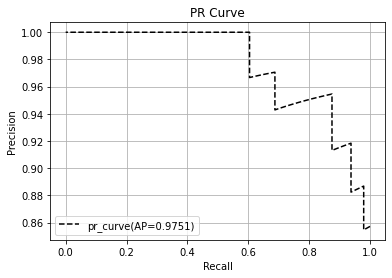

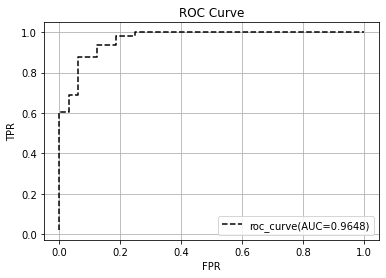

In [77]:
# 绘制ROC曲线和PR曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,roc_curve
 
 
def draw_pr(confidence_scores, data_labels):
    plt.figure()
    plt.title('PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
 
    #精确率，召回率，阈值
    precision,recall,thresholds = precision_recall_curve(data_labels,confidence_scores)
 
    from sklearn.metrics import average_precision_score
    AP = average_precision_score(data_labels, confidence_scores) # 计算AP
    plt.plot(recall, precision,'k--', label = 'pr_curve(AP=%0.4f)' % AP)
    plt.legend()
    plt.show()
 
def draw_roc(confidence_scores, data_labels):
    #真正率，假正率
    fpr, tpr, thresholds = roc_curve(data_labels, confidence_scores)
    plt.figure()
    plt.grid()
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
 
    from sklearn.metrics import auc
    auc=auc(fpr, tpr) #AUC计算
    plt.plot(fpr,tpr,'k--', label = 'roc_curve(AUC=%0.4f)' % auc)
    plt.legend()
    plt.show()
 
 
if __name__ == '__main__':
    draw_pr(pred, y_orgin)
    draw_roc(pred, y_orgin)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 50000 iterations
Omega: [[0.         2.15746373 1.98857912]] - Iter: 50000 - Last cost: 0.30 - Duration: 6.68s


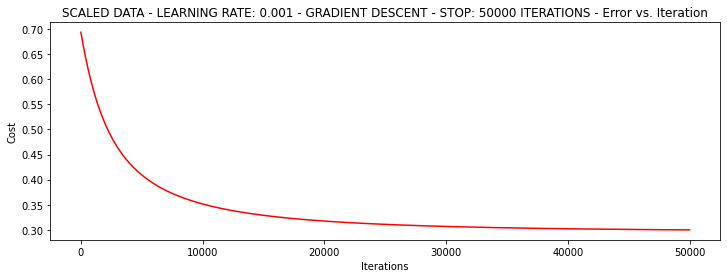

准确率为： 0.85


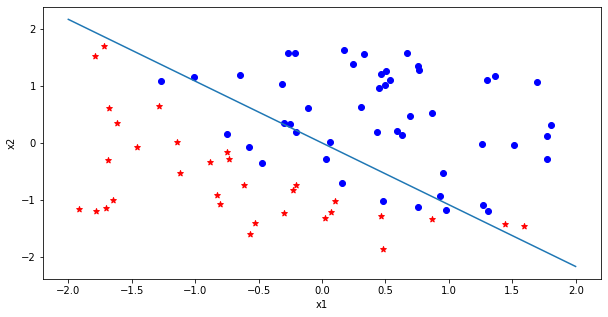

In [61]:
# 以下是非调库实现梯度下降法优化逻辑回归，由于效果一般故舍弃
import time
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

from sklearn.preprocessing import scale
 
# 停止准则
STOP_ITER = 0 # 迭代数量
STOP_COST = 1 # 损失函数
STOP_GRAD = 2 # 梯度值
 
 
def show_data(data):
    set_0 = data[data["y"]==0]
    set_1 = data[data["y"]==1]
    plt.figure(figsize=(10,5))
    plt.scatter(set_0["x1"], set_0["x2"], c="r", marker="*")
    plt.scatter(set_1["x1"], set_1["x2"], c="b", marker="o")
    x1_ = np.arange(-2, 2, 0.001)

    x2_ = (- Omega[0][0] - Omega[0][1] * x1_) / Omega[0][2]
    plt.plot(x1_, x2_)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
 
#logistic function
def sigmode(z):
    return 1 / (1+ np.exp(-z))
 
#logistic regression
def model(X, Omega):
    """
    X：样本矩阵 （包括第一列的1）
    Omega : 行向量 [w0， w1, ....wn]
    返回预测的结果值
    :return:
    """
    return sigmode(np.dot(X, Omega.T))
#maximum likelihood
def cost(X, y, Omega):
    """
    获取样本的损失值，为所有样本的损失均值
    """
    # 注意，multipy和 np.dot的区别
    left = np.multiply(-y, np.log(model(X,Omega)))
    right = np.multiply(1-y, np.log(1 - model(X,Omega)))
    return np.sum(left-right) / len(X)
 
def gradient(X,y,Omega):
    """
    计算梯度，返回一个和Omega 一样的数组
    :return:
    """
    #二维数组，1*n
    grad = np.zeros(shape=Omega.shape)
    # error n*1
    error = y- model(X,Omega)
    for j in range(grad.shape[1]):
        # grad 1*n ,
        grad[0, j] = - np.dot(error.T, X[:,j]) / X.shape[0]
    return grad
 

 
def stop_cretion(type, value, threshold):
    if type == STOP_ITER:   return value > threshold
    elif type == STOP_COST: return  abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD: return np.linalg.norm(value) < threshold
 
# 重排数据
def shuffle_data(data):
    np.random.shuffle(data)
    X= data[:,:-1]
    y = data[:,-1:]
    return X,y
 
def descent(data, Omega, batchsize, stoptype, threshold, alpha):
 
    i=0  #迭代次数
    b =0 #批量位置索引
    init_time = time.time()
 
    # 初始化梯度：
    grad = np.zeros(Omega.shape)
 
    #首先对数据清洗
    X, y = shuffle_data(data)
 
    # 初始化cost
    cost_value = [cost(X,y,Omega)]
 
    while True:
        # 先求梯度：
        grad = gradient(X[b:b+batchsize,:], y[b:b+batchsize,:], Omega)
        b += batchsize
 
        #执行完一次后对数据重新洗牌
        if b>= X.shape[0]:
            b=0
            X,y = shuffle_data(data)
 
        # 根据梯度更新参数
        Omega = Omega - alpha * grad
        # 损失值
        ## 注意：尽管求梯度时不一定用到所有样本，但求损失值时，用的是所有样本
        cost_value.append(cost(X,y,Omega))
        i+=1
 
        if stoptype == STOP_ITER: value=i
        elif stoptype == STOP_COST: value= cost_value
        elif stoptype == STOP_GRAD: value= grad
 
        #判断是否
        if stop_cretion(stoptype, value, threshold): break
        # 返回： Omega ,迭代次数，损失值，当前梯度， 运行时间
    return Omega, i-1, cost_value, grad, time.time() - init_time
 
def run(data, Omega, batchSize, stopType, thresh, alpha):
    Omega, iter, costs, grad, dur = descent(data, Omega, batchSize, stopType, thresh, alpha)
    # 根据结果绘制图形
    name = "Original" if (data[:, 1] > 2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize == data.shape[0]:
        strDescType = "Gradient"
    elif batchSize == 1:
        strDescType = "Stochastic"
    else:
        strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER:
        strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST:
        strStop = "costs change < {}".format(thresh)
    else:
        strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print("***{}\nOmega: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, Omega, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    plt.show()
    return Omega
 
def predict(X, Omega):
    return [1 if x> 0.5 else 0 for x in model(X,Omega)]
 
def acuuracy(y,predict_value):
    _y =y.ravel()
    correct = [1 if _y[i] == predict_value[i] else 0
               for i in range(len(_y))]
    return np.sum(correct) / len(_y)
 
 
 
if __name__ == '__main__':
    # 读取数据
    data = pd.read_csv("5_train.csv", header=None, names=["x1", "x2", "y"])
    #print(data.head(3))
    #print(data.shape)
    
    
    # 数据增加1列，
    data.insert(0,"Ones",value=1)
    #print(data.loc[:3,:])
 
    # set X and y
    orig_data =data.values
    # m 样本的数量， n 特征数量+1（label）
    m,n = orig_data.shape
    Omega = np.zeros(shape=(1, n - 1))
    #批量梯度下降
    # 按迭代次数为终止条件：
    # run(orig_data, Omega, m, STOP_ITER, 5000, 0.000001)
 
    # 按损失值的差值
    # run(orig_data, Omega, m, STOP_COST, thresh=0.000001, alpha=0.001)
 
    # 根据梯度变化停止
    # run(orig_data, Omega, m, STOP_GRAD, thresh=0.05, alpha=0.001)
 
    #标准化
    orig_data[:,:(n-1)] = scale(orig_data[:,:(n-1)])
    
    Omega = run(orig_data, Omega, m, STOP_ITER, 50000, 0.001)
    #Omega = run(orig_data, Omega, m, STOP_COST, thresh=0.000001, alpha=0.001)
    #Omega = run(orig_data, Omega, m, STOP_GRAD, thresh=0.05, alpha=0.001)

    #计算准确率
    print("准确率为：", acuuracy(orig_data[:,-1], predict(orig_data[:,:(n-1)], Omega)))
    df=pd.DataFrame(orig_data,columns=['1','x1','x2','y'])
    show_data(df)
    
 